In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

erau_blue = "#03539E"
erau_gold = "#FFCB06"

np.random.seed(59)

In [129]:
# load data from ASCII raster files exported from ArcGIS Pro 3.1.0
# these are the lidar DEM rasters only within the rectangular
# Areas of Interest (AOIs) around Frank Rendon Park and Tropic Shores Resort

frankpre = pd.read_csv('frankpre.txt', header=None, skiprows=[0,1,2,3,4,5], delimiter=' ').to_numpy().ravel()
frankpost = pd.read_csv('frankpost.txt', header=None, skiprows=[0,1,2,3,4,5], delimiter=' ').to_numpy().ravel()
tropicpre = pd.read_csv('tropicpre.txt', header=None, skiprows=[0,1,2,3,4,5], delimiter=' ').to_numpy().ravel()
tropicpost = pd.read_csv('tropicpost.txt', header=None, skiprows=[0,1,2,3,4,5], delimiter=' ').to_numpy().ravel()

In [130]:
# show the count and 10 random values from each array to make sure they look as expected
# Note: -9999 is the "NO DATA" value, we expect a lot of those due to the shape of the AOIs

print(f"Frank Pre [{len(frankpre)}] {np.random.choice(frankpre, size=10, replace=False)}\n")
print(f"Frank Post [{len(frankpost)}] {np.random.choice(frankpost, size=10, replace=False)}\n")
print(f"Tropic Pre [{len(tropicpre)}] {np.random.choice(tropicpre, size=10, replace=False)}\n")
print(f"Tropic Post [{len(tropicpost)}] {np.random.choice(tropicpost, size=10, replace=False)}")

Frank Pre [112560] [-9.999000e+03 -9.999000e+03  1.615285e+00  4.184040e+00 -9.999000e+03
  5.663323e+00  6.692235e+00 -9.999000e+03 -9.999000e+03 -9.999000e+03]

Frank Post [112560] [-9.999000e+03 -9.999000e+03 -9.999000e+03  4.462358e+00 -9.999000e+03
 -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03]

Tropic Pre [2596836] [-9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999.]

Tropic Post [2596836] [-9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999.]


In [131]:
# clean out the no data values

frankpre = np.delete(frankpre, frankpre==-9999.0)
frankpost = np.delete(frankpost, frankpost==-9999.0)
tropicpre = np.delete(tropicpre, tropicpre==-9999.0)
tropicpost = np.delete(tropicpost, tropicpost==-9999.0)

In [132]:
# show the count and 10 random values from each array to make sure they look as expected
# Note: -9999 is the "NO DATA" value, we expect none of these after cleaning
# we also expect fewer values in each list than the one calculated above

print(f"Frank Pre [{len(frankpre)}] {np.random.choice(frankpre, size=10, replace=False)}\n")
print(f"Frank Post [{len(frankpost)}] {np.random.choice(frankpost, size=10, replace=False)}\n")
print(f"Tropic Pre [{len(tropicpre)}] {np.random.choice(tropicpre, size=10, replace=False)}\n")
print(f"Tropic Post [{len(tropicpost)}] {np.random.choice(tropicpost, size=10, replace=False)}")

Frank Pre [45677] [4.843261 5.268703 4.878994 5.630337 5.549005 4.675676 6.467113 1.176393
 5.943841 1.729189]

Frank Post [45677] [4.825736  4.554459  2.069592  0.8368828 5.380582  0.9504408 4.328161
 0.4413987 4.770238  3.465006 ]

Tropic Pre [47524] [7.122818  5.927705  5.088861  4.538074  4.553535  5.377905        nan
 5.831362  0.8367317 5.500021 ]

Tropic Post [47524] [0.2421662 5.499392  5.529273  5.933816  5.771041  6.227787  0.2161977
 5.754151  1.289049  4.644737 ]


In [133]:
# since the distribution of the elevations is not gaussian,
# we will bootstrap subsamples of values, with replacement,
# and compute their means for comparison

num_bootsamples = 10000
num_eachboot = 500

frankpre_boot = np.array([np.mean(np.random.choice(frankpre, size=num_eachboot, replace=True)) for s in range(num_bootsamples)])
frankpre_boot = frankpre_boot[~np.isnan(frankpre_boot)] # remove nan values
frankpost_boot = np.array([np.mean(np.random.choice(frankpost, size=num_eachboot, replace=True)) for s in range(num_bootsamples)])
frankpost_boot = frankpost_boot[~np.isnan(frankpost_boot)] # remove nan values
tropicpre_boot = np.array([np.mean(np.random.choice(frankpre, size=num_eachboot, replace=True)) for s in range(num_bootsamples)])
tropicpre_boot = tropicpre_boot[~np.isnan(tropicpre_boot)] # remove nan values
tropicpost_boot = np.array([np.mean(np.random.choice(frankpost, size=num_eachboot, replace=True)) for s in range(num_bootsamples)])
tropicpost_boot = tropicpost_boot[~np.isnan(tropicpost_boot)] # remove nan values

frank_mean_damage = np.mean(frankpre_boot) - np.mean(frankpost_boot)
tropic_mean_damage = np.mean(tropicpre_boot) - np.mean(tropicpost_boot)

''

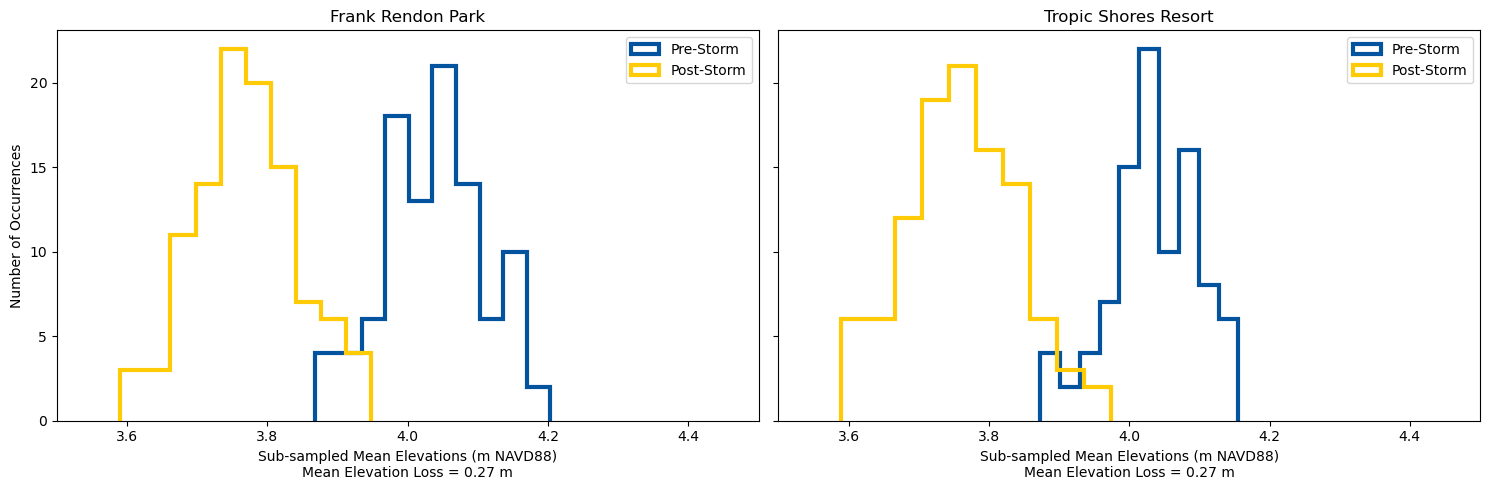

In [137]:
bins = 10

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax[0].hist(frankpre_boot, bins=bins, histtype='step', lw=3.0, color=erau_blue, label="Pre-Storm")
ax[0].hist(frankpost_boot, bins=bins, histtype='step', lw=3.0, color=erau_gold, label="Post-Storm")
ax[0].set_xlim([3.5,4.5])
ax[0].set_xlabel(f"Sub-sampled Mean Elevations (m NAVD88)\nMean Elevation Loss = {np.around(frank_mean_damage,2)} m")
ax[0].set_ylabel("Number of Occurrences")
ax[0].set_title("Frank Rendon Park")
ax[0].legend()

ax[1].hist(tropicpre_boot, bins=bins, histtype='step', lw=3.0, color=erau_blue, label="Pre-Storm")
ax[1].hist(tropicpost_boot, bins=bins, histtype='step', lw=3.0, color=erau_gold, label="Post-Storm")
ax[1].set_xlim([3.5,4.5])
ax[1].set_xlabel(f"Sub-sampled Mean Elevations (m NAVD88)\nMean Elevation Loss = {np.around(tropic_mean_damage,2)} m")
ax[1].set_title("Tropic Shores Resort")
ax[1].legend()

plt.tight_layout()
plt.savefig("elevation_histograms.png", dpi=1000)

; # semi-colon removes Python datatype header in output